## Investigate Hotel Business

### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path='/content/drive/MyDrive/Dataset/hotel_bookings_data.csv'
df=pd.read_csv(path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.shape

(119390, 29)

This dataset have 119.390 of Rows and 29 of Columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [6]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


### Handling Missing Value

In [7]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

There are 4 columns with missing values : children,city,agent,company

In [8]:
# drop rows with missing value in children coloumn
df = df.dropna(subset=['children'])

In [9]:
# Replacing the missing values with mean (numerical)
df['agent'] = df['agent'].fillna(df['agent'].mean())

In [10]:
# Replacing the missing values with mode (categorical)
df['city'] = df['city'].fillna(df['city'].mode()[0])

In [11]:
# drop company column
df.drop('company', axis=1, inplace=True)

In [12]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

### Handling Inappropriate Value

In [13]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [14]:
# changing 'Undefined' in meal column to 'Half Board'
df['meal']=df['meal'].str.replace('Undefined', 'Half Board')

In [15]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Half Board'],
      dtype=object)

### Drop Unnecessary Value

In [16]:
# Creating total_guest column with sum of adults, children, babies columns
df['total_guest']=df['adults']+df['children']+df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,86.694841,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,86.694841,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,86.694841,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.000000,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.000000,0,Personal,98.0,0,1,Check-Out,2.0


In [33]:
df['arrival_date_year'].value_counts()

2018    56623
2019    40620
2017    21963
Name: arrival_date_year, dtype: int64

There are 180 data with 0 (zero) total guest

for this analysis we only need data with > 0 number of customers

In [18]:
#get data with > 0 number of customers
df = df[df['total_guest'] != 0]

In [19]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,86.694841,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,86.694841,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,86.694841,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.000000,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.000000,0,Personal,98.0,0,1,Check-Out,2.0


In [30]:
#analyze comparison total hotel bookings by hotel type in every month
df1 = df.groupby(['arrival_date_month', 'hotel']).agg({'city' : 'count'}) #create aggregate table
df1 = df1.reset_index()
df1.columns = ['month', 'hotel_type', 'total_bookings']
df1

,month,hotel_type,total_bookings
0,April,City Hotel,4950
1,April,Resort Hotel,3102
2,August,City Hotel,7885
3,August,Resort Hotel,3044
4,December,City Hotel,7594
5,December,Resort Hotel,3553
6,February,City Hotel,4114
7,February,Resort Hotel,2645
8,January,City Hotel,4336
9,January,Resort Hotel,2435


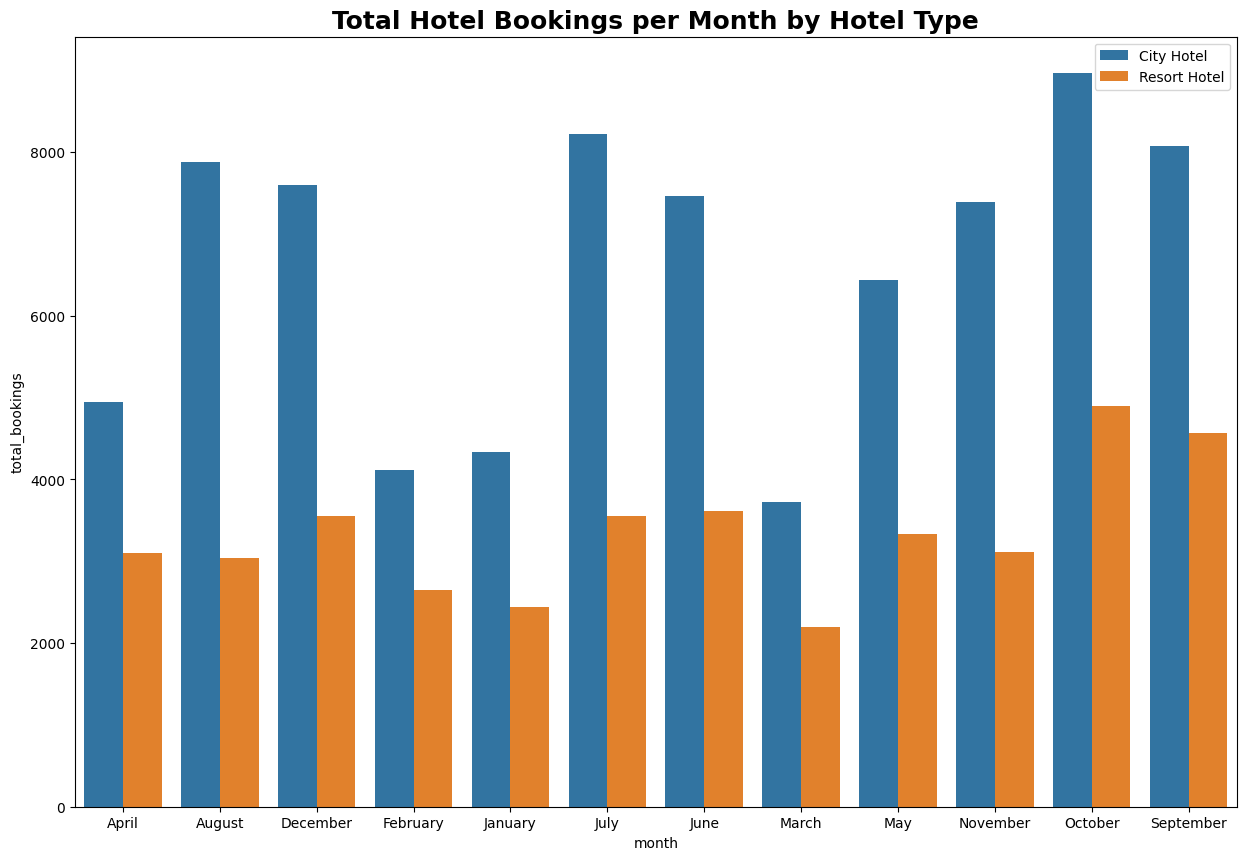

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(x='month', y='total_bookings', hue='hotel_type', data=df1)

plt.title("Total Hotel Bookings per Month by Hotel Type", fontsize=18, fontweight='bold')
plt.legend()
plt.show()

observstion:


*   in every month total bookings from city hotel is higher than resort hotel
*   highest total bookings hotel in both city hotel and resort hotel are from october
* Customers most likely bookings hotel in the end of the year (3 last month) than the beginning of the year (first 3 month)

